<a href="https://colab.research.google.com/github/macscheffer/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Mac_Scheffer_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [1]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

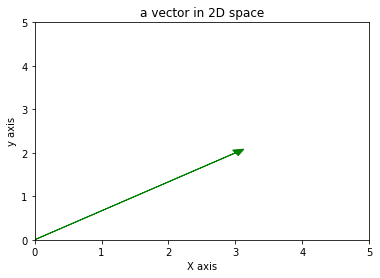

In [101]:
plt.arrow(0,0,3, 2, color='green', head_width=.15, head_length=.15)

plt.xlim(0,5)
plt.ylim(0,5)
plt.title('a vector in 2D space')
plt.xlabel('X axis')
plt.ylabel('y axis');

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [0]:
# the norm of a vector represents a 'length' or 'size' of a vector 
# the norm of a vector is always positive or 0.

In [11]:
np.linalg.norm([17, -4, -2, 1])

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [12]:
c = [3, 7, -2, 12]
d = [9, -7, 4, 6]

np.dot(c,d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
E = np.matrix('7 4 2; 1 3 -1; 2 6 -4')

In [110]:
np.linalg.inv(E), E.I # two ways to do the same thing.

(matrix([[ 0.17647059, -0.82352941,  0.29411765],
         [-0.05882353,  0.94117647, -0.26470588],
         [ 0.        ,  1.        , -0.5       ]]),
 matrix([[ 0.17647059, -0.82352941,  0.29411765],
         [-0.05882353,  0.94117647, -0.26470588],
         [ 0.        ,  1.        , -0.5       ]]))

In [109]:
np.transpose(E)

matrix([[ 7,  1,  2],
        [ 4,  3,  6],
        [ 2, -1, -4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [20]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [0]:
# customer mean, variance and std dev.
def mean(numbers):
    total = 0
    count = 0
    for number in numbers:
        total = total + number
        count = count + 1     
    return total/count

def var(numbers):
    return (sum([(number - mean(numbers))**2 for number in numbers]) / (len(numbers) -1))

def stdev(numbers):
    return var(numbers)**(1/2)

In [31]:
# customers w/ my functions then pandas.
mean(customers), var(customers), stdev(customers)

(1135.7142857142858, 98761.90476190478, 314.26406851866597)

In [34]:
pd.Series(customers).mean(), pd.Series(customers).var(), pd.Series(customers).std()

(1135.7142857142858, 98761.90476190478, 314.26406851866597)

In [35]:
#snow in just pandas

pd.Series(snow).mean(), pd.Series(snow).var(), pd.Series(snow).std()

(2.7142857142857144, 8.571428571428571, 2.9277002188455996)

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
# quickly no - the variance in customers will almost always be higher just bc of the nature of the units its measured in.
# look at measures like the z-score, but we'd first transform var into stddev, variance is not good for intuitively comparing.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [39]:
np.cov(customers,snow)

array([[9.87619048e+04, 6.70238095e+02],
       [6.70238095e+02, 8.57142857e+00]])

In [43]:
# fairly correlated
np.corrcoef(customers,snow)

array([[1.        , 0.72846346],
       [0.72846346, 1.        ]])

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [111]:
# Let me get you some data to start you off.
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

data = pd.DataFrame(data)

# Look at the data
data.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [112]:
data.dtypes

Alcoholic Drinks       int64
Beverages              int64
Carcass_Meat           int64
Cereals                int64
Cheese                 int64
Confectionery          int64
Country               object
Fats_and_Oils          int64
Fish                   int64
Fresh_Fruit            int64
Fresh_Potatoes         int64
Fresh_Veg              int64
Other_Meat             int64
Other_Veg              int64
Processed_Potatoes     int64
Processed_Veg          int64
Soft_Drinks            int64
Sugars                 int64
dtype: object

In [113]:
data.isna().sum().sum()

0

In [0]:
df = data.copy()

In [0]:
df = df.drop(columns='Country')

In [119]:
df = df.astype(float)
df.dtypes

Alcoholic Drinks      float64
Beverages             float64
Carcass_Meat          float64
Cereals               float64
Cheese                float64
Confectionery         float64
Fats_and_Oils         float64
Fish                  float64
Fresh_Fruit           float64
Fresh_Potatoes        float64
Fresh_Veg             float64
Other_Meat            float64
Other_Veg             float64
Processed_Potatoes    float64
Processed_Veg         float64
Soft_Drinks           float64
Sugars                float64
dtype: object

In [0]:
std_sc = StandardScaler()
df_std = std_sc.fit_transform(X=df)

In [137]:
pd.DataFrame(df_std).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000,4.000000,4.000000e+00,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000e+00
mean,0.000000,-5.551115e-17,0.000000,6.938894e-18,0.000000,5.551115e-17,6.938894e-18,0.000000,0.000000,0.000000,5.551115e-17,0.000000,0.000000,0.000000,-5.551115e-17,-2.775558e-17,-5.551115e-17
std,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701,1.154701,1.154701e+00,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701e+00
min,-1.663384,-1.090266e+00,-1.277169,-8.555755e-01,-1.729885,-1.576656e+00,-1.097071e+00,-1.464967,-1.609137,-1.335847,-1.247006e+00,-1.483121,-1.283054,-1.260994,-1.098378e+00,-1.404236e+00,-1.137656e+00
25%,-0.337098,-6.230090e-01,-0.489873,-6.971356e-01,-0.030617,-4.978915e-01,-7.485897e-01,-0.615286,-0.445460,-0.671519,-8.441271e-01,-0.565440,-0.693036,-0.567447,-9.336213e-01,-6.774824e-01,-6.900536e-01
50%,0.410780,-2.595871e-01,-0.122468,-4.119437e-01,0.535805,3.042670e-01,-2.194142e-01,0.156263,0.339920,-0.007190,7.673883e-02,0.142132,-0.059314,-0.126099,-3.661260e-02,1.067548e-01,-2.051511e-01
75%,0.747878,3.634219e-01,0.367405,2.851918e-01,0.566422,8.021585e-01,5.291754e-01,0.771549,0.785380,0.664329,9.208660e-01,0.707572,0.633722,0.441348,8.970087e-01,7.842372e-01,4.849025e-01
max,0.841823,1.609440e+00,1.522105,1.679463e+00,0.658275,9.681224e-01,1.535899e+00,1.152440,0.929297,1.350227,1.093528e+00,1.198856,1.401682,1.513193,1.171603e+00,1.190727e+00,1.547958e+00


In [136]:
pd.DataFrame(df_std).mean()
# those are all zero its just scientific notation

0     0.000000e+00
1    -5.551115e-17
2     0.000000e+00
3     6.938894e-18
4     0.000000e+00
5     5.551115e-17
6     6.938894e-18
7     0.000000e+00
8     0.000000e+00
9     0.000000e+00
10    5.551115e-17
11    0.000000e+00
12    0.000000e+00
13    0.000000e+00
14   -5.551115e-17
15   -2.775558e-17
16   -5.551115e-17
dtype: float64

In [139]:
pd.DataFrame(df_std).std(ddof=0)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
dtype: float64

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [141]:
pd.DataFrame(df_std).shape

(4, 17)

In [0]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca_2 = PCA(2)
pc_2 = pca_2.fit_transform(X=df_std)
pca_2_df = pd.DataFrame({
    'pc1': pc_2[:,0], 'pc2': pc_2[:,1]
})

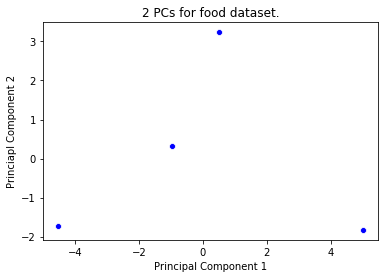

In [149]:
# welp they are spread apart so thats good.
sns.scatterplot(x='pc1', y='pc2', data=pca_2_df, color='blue')
plt.title('2 PCs for food dataset.')
plt.xlabel('Principal Component 1')
plt.ylabel('Princiapl Component 2');


# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [74]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
from sklearn.cluster import KMeans

distances = []

for k in range(1,15):
  km = KMeans(k)
  km = km.fit(points)
  points[str(k)+'means_cluster'] = km.labels_
  distances.append(km.inertia_)

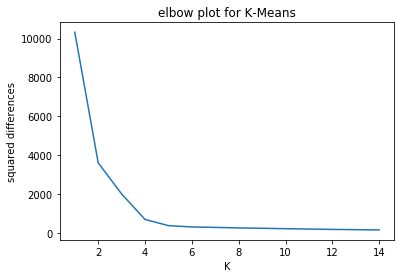

In [84]:
plt.plot(range(1,15), distances)
plt.title('elbow plot for K-Means')
plt.ylabel('squared differences')
plt.xlabel('K');

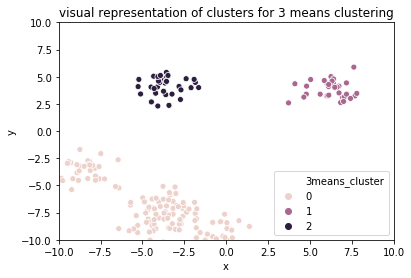

In [87]:
# it looks like 4 woud have been a better choice so i will show that graph.
sns.scatterplot(x='x', y='y', data=points, hue='3means_cluster')
plt.title('visual representation of clusters for 3 means clustering')
plt.xlim(-10,10)
plt.ylim(-10,10);

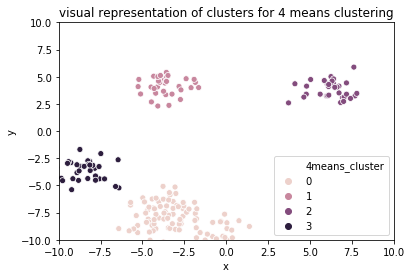

In [89]:
sns.scatterplot(x='x', y='y', data=points, hue='4means_cluster')
plt.title('visual representation of clusters for 4 means clustering')
plt.xlim(-10,10)
plt.ylim(-10,10);

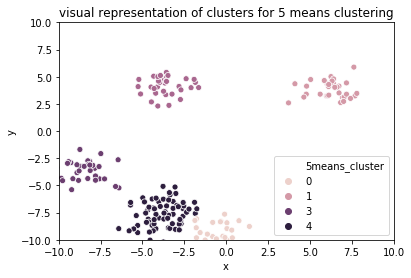

In [134]:
# i think the 5th cluster adds to much noise
sns.scatterplot(x='x', y='y', data=points, hue='5means_cluster')
plt.title('visual representation of clusters for 5 means clustering')
plt.xlim(-10,10)
plt.ylim(-10,10);

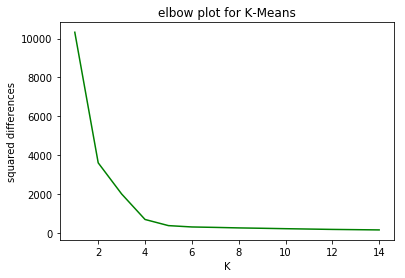

In [153]:
# k=5 tries to over fit the data, as we can see in the elbow plot as well as in our scatter plot it looks like 4 is optimal.

plt.plot(range(1,15), distances, color='green')
plt.title('elbow plot for K-Means')
plt.ylabel('squared differences')
plt.xlabel('K');

In [0]:
# happy friday!